In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import one_hot

In [68]:
label_names = ['no', 'yes', 'on', 'off', 'down', 'up', 'left', 'right', 'go', 'wow']

data = np.load('voice_mfcc.npz')

X_train_std, y_train_num, X_test_std, y_test_num = [data[f] for f in data.files]

(15000, 13, 99)
(15000,)
left


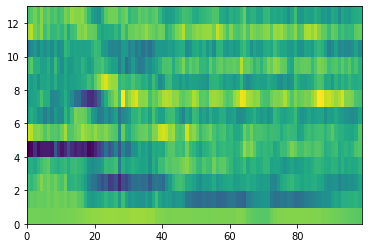

In [69]:
print(X_train_std.shape)
print(y_train_num.shape)
idx = 10005
plt.pcolormesh(X_train_std[idx])
print(label_names[y_train_num[idx]])

In [70]:
input_shape = X_train_std.shape[1] * X_train_std.shape[2]
print(input_shape)

1287


In [71]:
X_train_flat = np.reshape(X_train_std, (-1, input_shape))
X_test_flat = np.reshape(X_test_std, (-1, input_shape))
print(X_train_flat.shape, X_test_flat.shape)

(15000, 1287) (2000, 1287)


In [72]:
X_train_conv = np.reshape(X_train_std, (-1, 13, 99, 1))
X_test_conv = np.reshape(X_test_std, (-1, 13, 99, 1))

In [73]:
y_train_one_hot = one_hot(indices=y_train_num, depth=10)
y_test_one_hot = one_hot(indices=y_test_num, depth=10)

In [77]:
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Add, Activation, Conv2D, Flatten
from keras.constraints import unit_norm

In [75]:

# model_intput = Input(shape=(input_shape,))
# model = Dense(units=1024, activation='relu', 
#                  input_dim=input_shape, kernel_constraint=unit_norm())(model_intput)
# model = Dropout(0.5)(model)
# model = Dense(units=256)(model)
# shortcut = model
# model = Activation('relu')(model)
# model = Dense(units=512, activation='relu')(model)
# model = Dense(units=256)(model)
# added = Add()([shortcut, model])
# model = Activation('relu')(added)
# model = Dense(units=128, activation='relu')(model)
# model = Dense(units=10, activation='softmax')(model)
# model = Model(inputs=model_intput, output = model)

c:\users\wiktor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [95]:
model_input = Input(shape=(13,99, 1))
model = Conv2D(filters=8, kernel_size=(3,3), strides=(2,2),
              padding='same', activation='relu')(model_input)
model = Conv2D(filters=16, kernel_size=(3,3), strides=(2,2),
              padding='same', activation='relu')(model)
model = Flatten()(model)
model = Dense(units=1024, activation='relu')(model)
model = Dropout(0.6)(model)
model = Dense(units=10, activation='softmax')(model)
model = Model(inputs=model_input, output=model)

W1015 17:47:51.987246 10744 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
c:\users\wiktor\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  # Remove the CWD from sys.path while we load stuff.


In [96]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 13, 99, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 50, 8)          80        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 25, 16)         1168      
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_133 (Dense)            (None, 1024)              1639424   
_________________________________________________________________
dropout_36 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_134 (Dense)            (None, 10)                1025

In [97]:
# model = Sequential()
# model.add(Dense(units=512, 
#                 input_dim=input_shape, kernel_constraint=unit_norm()))
# model.add(Dropout(0.5))
# shortcut = model.output
# model.add(Activation('relu'))
# model.add(Dense(units=512, activation='relu'))
# model.add(Dense(units=512))
# added = model.output + shortcut
# print(added)
# added_layer = Add()([model, shortcut])
# model.add(added_layer)
# model.add(Activation('relu'))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(units=10, activation='softmax'))

In [98]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [99]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 13, 99, 1)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 50, 8)          80        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 25, 16)         1168      
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_133 (Dense)            (None, 1024)              1639424   
_________________________________________________________________
dropout_36 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_134 (Dense)            (None, 10)                1025

In [100]:
model.fit(X_train_conv, y_train_one_hot, epochs=10, steps_per_epoch=20, 
          validation_data=(X_test_conv, y_test_one_hot), validation_steps=20)

Train on 15000 samples, validate on 2000 samples
Epoch 1/10
20/20 [==============================] - 153s 8s/step - loss: 1.6711 - acc: 0.4339 - val_loss: 1.2982 - val_acc: 0.5840
Epoch 2/10
20/20 [==============================] - 162s 8s/step - loss: 1.0554 - acc: 0.6572 - val_loss: 0.9602 - val_acc: 0.6930
Epoch 3/10
20/20 [==============================] - 167s 8s/step - loss: 0.6708 - acc: 0.7852 - val_loss: 0.7589 - val_acc: 0.7510
Epoch 4/10
20/20 [==============================] - 164s 8s/step - loss: 0.4227 - acc: 0.8676 - val_loss: 0.6840 - val_acc: 0.7915
Epoch 5/10
20/20 [==============================] - 163s 8s/step - loss: 0.2673 - acc: 0.9195 - val_loss: 0.6703 - val_acc: 0.8000
Epoch 6/10
20/20 [==============================] - 164s 8s/step - loss: 0.1684 - acc: 0.9520 - val_loss: 0.6849 - val_acc: 0.8065
Epoch 7/10
20/20 [==============================] - 164s 8s/step - loss: 0.1085 - acc: 0.9719 - val_loss: 0.7118 - val_acc: 0.8105
Epoch 8/10
20/20 [================